<a href="https://colab.research.google.com/github/BeatrizPCandido/pretalab-ciclo14-git-github/blob/main/C%C3%B3pia_de_Aula_20_Estat%C3%ADstica_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Probabilidade, Amostragem e Testes de Hipóteses em Python

> Nesta aula, vamos entender como a estatística descritiva se transforma em **inferência estatística** — ou seja, como podemos **tirar conclusões sobre uma população** com base em **amostras de dados**.


## Objetivos da Aula

Ao final desta aula, você será capaz de:
- Compreender os conceitos básicos de **probabilidade**;
- Aplicar técnicas simples de **amostragem de dados**;
- Entender os princípios dos **testes de hipóteses**;
- Implementar essas análises na prática com **Python (NumPy, Pandas e SciPy)**.


In [1]:
## Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações visuais
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,4)

## 1. Conceitos Fundamentais de Probabilidade

Para lidar cientificamente com experimentos do cotidiano, necessitamos de formulações matemáticas para ambos (determinísticos e aleatórios). Para isso, modelos teóricos são construídos para cada caso. Por exemplo, a Física clássica lida com problemas em experimentos determinísticos e a Estatística lida com problemas em experimentos aleatórios.


A **probabilidade** é uma forma matematicamente coerente de medir a **chance de um evento ocorrer**.

\[
P(A) = número de casos favoráveis/número total de casos possíveis
\]

**Exemplo simples: Cara ou Coroa**

A probabilidade de cara (ou coroa) é de 50%, pois existem dois resultados possíveis e ambos têm a mesma chance.

In [2]:
p_cara = 1/2
p_1_dado = 1/6

p_par_dado = 3/6

**Exemplo: Lançamento de Dado**

In [4]:
# Simulando 10.000 lançamentos de um dado
lancamentos = np.random.randint(1, 7, 10000)
lancamentos

# Probabilidade de sair um número par
p_par = np.mean(lancamentos % 2 == 0)
p_par

np.float64(0.499)

## Criando um modelo probabilístico

Basicamente, a teoria é baseada na construção de um modelo matemático para representar e tratar experimentos aleatórios. Esta construção pode ser sumarizada em dois passos:

1. Para cada experimento aleatório, descreva todo o conjunto de possíveis resultados;

2. “Atribua pesos” a cada possível resultado que reflita a sua chance de ocorrência durante a realização do experimento.


Assim, para descrever o conjunto de possíveis resultados de um experimento, temos a importância da definição do conceito de espaço amostral.

O **Espaço amostral** é um conjunto de (todos) possíveis resultados que podemos ter ao realizar um experimento aleatório.  Ele pode ser finito, infinito enumerável ou, simplesmente, infinito. Cada resultado possível é chamado de ponto ou evento elementar

### Tipos de Eventos

| Tipo                      | Descrição                                 | Exemplo                    |
| ------------------------- | ----------------------------------------- | -------------------------- |
| **Mutuamente exclusivos** | Um evento impede o outro                  | Cara ou coroa              |
| **Independentes**         | Um evento não afeta o outro               | Lançar duas moedas         |
| **Dependentes**           | Um evento altera a probabilidade do outro | Tirar cartas sem reposição |


### Lei da probabilidade composta

P(A∩B)=P(A)×P(B)

In [5]:
# Probabilidade de sair "cara" em dois lançamentos
p_duas_caras = p_cara * p_cara
p_duas_caras


0.25

### Exercícis Práticos - Probabilidade

1. Um dado de 6 faces é lançado uma vez.

* Qual é a probabilidade de sair um número par?

* Qual é a probabilidade de sair um número maior que 4?

* Faça uma simulação em Python com 10.000 lançamentos para verificar se a probabilidade empírica (observada) se aproxima da teórica.

In [12]:
p_teorica_impar = 3/6
print("p_teorica_impar:", p_teorica_impar)

p_teorica_maior4 = 2/6
print("p_teorica_maior4:", p_teorica_maior4)

lancamentos = np.random.randint(1, 7, 10000)

p_emp_impar = np.sum(lancamentos%2!=0)/len(lancamentos)
print("p_emp_impar:", p_emp_impar)

p_emp_maior4 = np.sum(lancamentos>4)/len(lancamentos)
print ("p_emp_maior4:", p_emp_maior4)


p_teorica_impar: 0.5
p_teorica_maior4: 0.3333333333333333
p_emp_impar: 0.5031
p_emp_maior4: 0.3296


In [8]:
# Faça uma simulação em Python com 10.000 lançamentos para verificar se a probabilidade empírica (observada) se aproxima da teórica.
lancamentos = np.random.randint(1, 7, 10000)
lancamentos

# Probabilidade de sair um número par
p_par = np.mean(lancamentos % 2 == 0)
p_par

np.float64(0.4939)

2. “Qual é a chance de um aluno atingir determinada nota?”
Contexto: Suponha que temos um conjunto de dados com as notas de 1000 estudantes no ENEM (nota geral de 0 a 1000). Queremos saber:

* Qual é a probabilidade de um aluno tirar nota acima de 700?

* E a chance de tirar abaixo de 500?

In [21]:
#“Qual é a chance de um aluno atingir determinada nota?” Contexto: Suponha que temos um conjunto de dados com as notas de 1000 estudantes no ENEM (nota geral de 0 a 1000). Queremos saber:
#Qual é a probabilidade de um aluno tirar nota acima de 700?
#E a chance de tirar abaixo de 500?
notas = np.random.randint(0, 1001, 1000)



In [22]:

# Probabilidade de um aluno tirar nota acima de 700
p_acima_700 = np.sum(notas > 700) / len(notas)
p_acima_700
print("p_acima_700",p_acima_700)

#E a chance de tirar abaixo de 500?
p_abaixo_500 = np.sum(notas < 500) / len(notas)
p_abaixo_500
print("p_abaixo_500",p_abaixo_500)


p_acima_700 0.306
p_abaixo_500 0.503


In [23]:
acima_700 = np.sum(notas > 700)/len(notas)
acima_700

np.float64(0.306)

In [24]:
acima_500 = np.sum(notas < 500)/len(notas)
acima_500

np.float64(0.503)

## 2. Distribuições de Probabilidade

Uma distribuição de probabilidade descreve como os valores possíveis de uma variável aleatória se comportam.

Isto é, como os valores de uma variável se distribuem.

### 🔹 Distribuição Uniforme

Todos os valores têm a mesma chance de ocorrer.

Exemplo: probabilidade de um número entre 0 e 10 ser sorteado — todos têm a mesma chance.

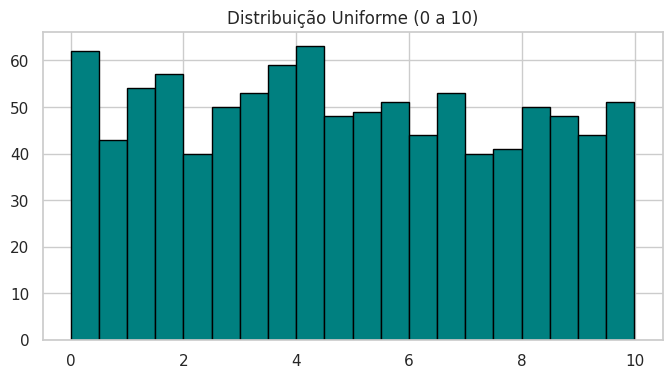

In [25]:
valores = np.random.uniform(0, 10, 1000)

plt.hist(valores, bins=20, color='teal', edgecolor='black')
plt.title('Distribuição Uniforme (0 a 10)')
plt.show()

### 🔹 Distribuição Normal (Gaussiana)

A famosa “curva em forma de sino”, muito comum em fenômenos naturais.

Muitos fenômenos reais seguem essa distribuição — altura, peso, notas, consumo etc.

Características: A média, mediana e moda são iguais, e os dados se concentram em torno do centro.

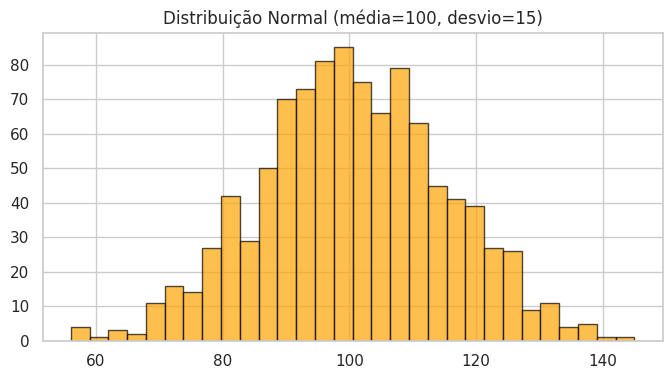

In [26]:
dados_normais = np.random.normal(100, 15, 1000)
plt.hist(dados_normais, bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribuição Normal (média=100, desvio=15)')
plt.show()

Características:

* Média, mediana e moda são iguais;

* 68% dos valores estão a ±1σ da média;

* 95% estão a ±2σ;

* 99,7% estão a ±3σ.

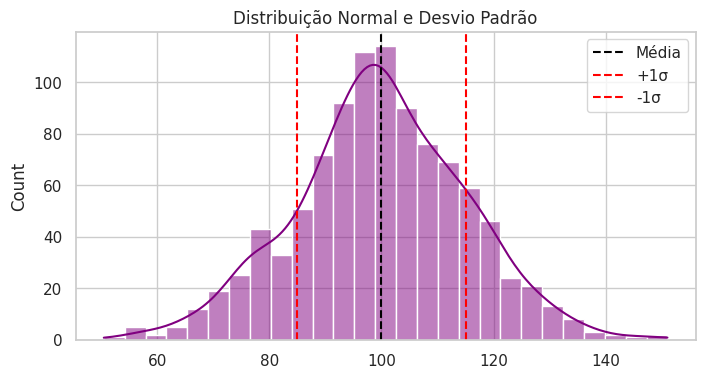

In [27]:
dados = np.random.normal(100, 15, 1000)
sns.histplot(dados, kde=True, color='purple')
plt.axvline(100, color='black', linestyle='--', label='Média')
plt.axvline(115, color='red', linestyle='--', label='+1σ')
plt.axvline(85, color='red', linestyle='--', label='-1σ')
plt.legend()
plt.title('Distribuição Normal e Desvio Padrão')
plt.show()

### Por que observar a distribuição é importante?

| Motivo                 | O que permite fazer                           | Exemplo ENEM                                   |
| ---------------------- | --------------------------------------------- | ---------------------------------------------- |
| Entender comportamento | Saber se há simetria, dispersão, concentração | Ver que a maioria das notas está entre 500–700 |
| Detectar outliers      | Identificar valores fora do padrão            | Um aluno com 950 pontos                        |
| Escolher testes        | Aplicar métodos adequados                     | Ver se pode usar teste t                       |
| Comunicar melhor       | Tornar resultados visuais e claros            | Mostrar curva de notas                         |
| Apoiar decisões        | Tomar ações baseadas nos padrões              | Focar apoio em alunos com notas < 500          |


## 3. Amostragem

Nem sempre é possível coletar todos os dados de uma população.
A amostragem é o processo de selecionar uma parte representativa dela.

### “Como estimar o desempenho nacional com poucos dados?”

📘 Contexto:
Se fosse impossível analisar todos os milhões de estudantes que fazem o ENEM. Então usaríamos amostras representativas para estimar a média e a dispersão das notas nacionais.

Interpretação prática:

* Amostras pequenas (ex: 30 alunos) podem flutuar mais.

* Amostras maiores (ex: 500 alunos) se aproximam da média real — Lei dos Grandes Números.

In [32]:
# Exemplo prático de amostragem
import pandas as pd

# Simulando uma população de 1000 clientes
populacao = pd.DataFrame({'idade': np.random.normal(35, 10, 1000).astype(int)})

# Amostra aleatória simples de 100 clientes
amostra = populacao.sample(100, random_state=42)

print("Média da população:", populacao['idade'].mean().round(2))
print("Média da amostra:", amostra['idade'].mean().round(2))

Média da população: 34.22
Média da amostra: 32.56


💡 Observe como a média da amostra tende a se aproximar da média da população — é o princípio da Lei dos Grandes Números.

### Visualizando a amostragem

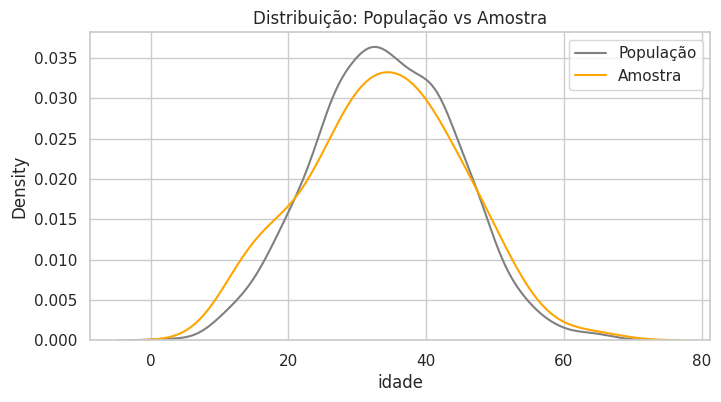

In [29]:
sns.kdeplot(populacao['idade'], label='População', color='gray')
sns.kdeplot(amostra['idade'], label='Amostra', color='orange')
plt.title('Distribuição: População vs Amostra')
plt.legend()
plt.show()

| Tipo                  | Descrição                                               | Exemplo                                  |
| --------------------- | ------------------------------------------------------- | ---------------------------------------- |
| **Aleatória simples** | Todos têm a mesma chance de serem escolhidos            | `np.random.choice()`                     |
| **Sistemática**       | Seleciona a cada k elementos                            | Cada 10ª pessoa em uma lista             |
| **Estratificada**     | Divide em grupos (estratos) e amostra proporcionalmente | Por gênero, idade, região                |
| **Por conveniência**  | Escolhe os mais acessíveis (menos rigoroso)             | Pesquisar apenas alunos da própria turma |


## Exercício Prático - Amostragem

Criando uma população fictícia de 10.000 estudantes, cujas notas sigam uma distribuição normal com: Média = 600; Desvio padrão = 100

In [38]:
# População simulada
np.random.seed(42)
populacao = np.random.normal(600, 100, 10000)

# Estatísticas da população
print(f"Média da população: {np.mean(populacao):.2f}")
print(f"Desvio padrão da população: {np.std(populacao):.2f}")

Média da população: 599.79
Desvio padrão da população: 100.34


Você é uma pesquisadora do INEP e quer estimar a média das notas de matemática do alunos do ensino fundamental. Analisar todos os estudantes do país é inviável, então você decide trabalhar com amostras.

* Extraia três amostras de tamanhos diferentes (n=30, n=100, n=500).

* Compare as médias.

In [42]:
populacao = pd.DataFrame({'notas': np.random.normal(5, 10, 1000).astype(int)})
populacao


,notas
0,16
1,-13
2,1
3,4
4,5
...,...
995,0
996,4
997,0
998,20


### Responda e discuta:

* O que acontece com a média da amostra à medida que o tamanho da amostra aumenta?

* As amostras pequenas são mais ou menos parecidas com a população?

* Que riscos existem se a amostra for pequena ou enviesada?

## 4. Introdução à Inferência

A Inferência Estatística tem por objetivo realizar afirmações sobre a população a partir da amostra (Upton and Cook 2014Upton, Graham, and Ian Cook. 2014. A Dictionary of Statistics 3e. Oxford university press.), ou seja, trata-se de um conjunto de procedimentos, baseados na Teoria de Probabilidades, para generalizar características de população a partir da informação contida na amostra.

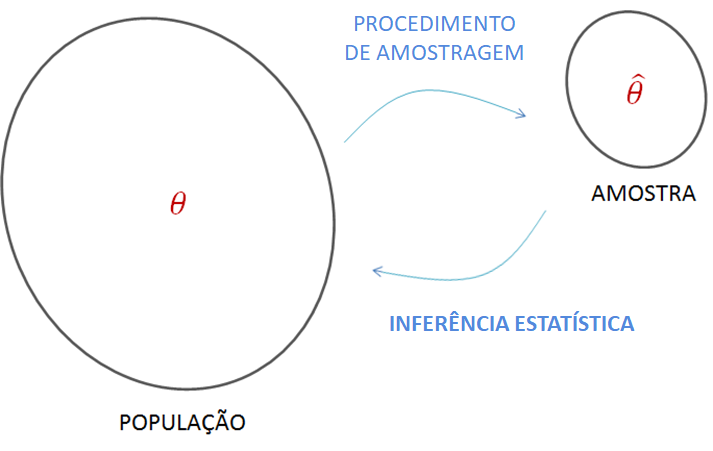

## 5. Testes de Hipóteses

http://leg.ufpr.br/~ara/teach/ebas/handout_10.html

Um teste de hipótese é um experimento mental com os dados.
Ele responde à pergunta:

“O que estou vendo aqui é apenas acaso, ou existe algo real acontecendo?”

🔹 Exemplo intuitivo

Imagine que você coordena um cursinho e quer saber:

“As alunas que participaram do grupo de estudos tiveram notas melhores no ENEM?”

Você tem duas turmas:

* Turma A (controle): não participou dos grupos de estudos

* Turma B (participante): participou

Agora você tem duas médias diferentes:

* Média da Turma A = 610

* Média da Turma B = 640

A diferença é de 30 pontos.
Mas será que isso é real ou poderia ter acontecido por acaso?

Os testes de hipóteses servem para avaliar se a diferença observada é estatisticamente significativa, isto é, se provavelmente não é fruto do acaso.

| Tipo                          | Nome          | Significado               |
| ----------------------------- | ------------- | ------------------------- |
| **H₀ (hipótese nula)**        | “Nada mudou.” | As médias são iguais.     |
| **H₁ (hipótese alternativa)** | “Algo mudou.” | As médias são diferentes. |


---
O termo hipótese remete a formulação provisória, suposição, pressuposição ou ideia. O termo teste remete a exame, verificação, pôr à prova.

Assim, os testes de hipóteses fornecem ferramentas que nos permitem verificar, rejeitar ou não rejeitar, uma hipótese sobre a população através das evidências fornecidas pela amostra.

Através dos métodos estatísticos de teste de hipótese, desejamos verificar se as informações contidas na amostra contrariam ou não afirmações feitas sobre a população.

Desta forma, uma hipótese estatística é uma afirmação sobre as características da distribuição de uma variável aleatória de uma população de interesse, em geral sobre seus parâmetros.

### Etapas de um teste de hipóteses

1. Formular hipóteses

* H₀ (nula)

* H₁ (alternativa)

2. Definir nível de significância (geralmente α = 0.05)

3. Calcular a estatística de teste e o valor-p (p-value)

4. Tomar decisão

* Se p < α → rejeita H₀

* Se p ≥ α → não rejeita H₀

* “Há diferença significativa entre escolas públicas e particulares?”

Queremos responder a pergunta: “Os alunos de escolas particulares têm desempenho médio maior que os de escolas públicas no ENEM?”

In [31]:
publica = np.random.normal(580, 90, 300)
particular = np.random.normal(630, 85, 300)

t, p = stats.ttest_ind(publica, particular)
print(f"t = {t:.2f}, p = {p:.4f}")

if p < 0.05:
    print("➡️ Rejeitamos H₀: há diferença significativa entre as médias.")
else:
    print("✅ Não rejeitamos H₀: não há diferença estatisticamente significativa.")


t = -7.39, p = 0.0000
➡️ Rejeitamos H₀: há diferença significativa entre as médias.


## Exercício Prático - Teste de Hipótese

## Referências

* http://www.leg.ufpr.br/~paulojus/estbas/
* http://leg.ufpr.br/~ara/teach/ebas/handout_06.html